# STATE THE QUESTION @ BEGINNING

[Bank Marketing Dataset](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

### The Problem

#### additional questions
Is gender relevant?<br>
Are social status and stability relevant?<br>
Is client-bank relationship relevant?<br>
Are bank profiling indicators relevant?<br>
Are social and economic indicators relevant?<br>


### Experiment Plan key components:
Analysis that highlights your experimental hypothesis<br>
A rollout plan showing how you would implement and rollout the experiment<br>
An evaluation plan showing what constitutes success in this experiment<br>


# mitchell





### The Potential Solution

### The Method of Testing the Solution

# Explore the dataset: what provokes a question?

In [148]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import re

In [149]:
# load the dataset
df = pd.read_csv('~/src/data/u1CapstoneData/bank-additional-full.csv', sep = ';')
df.info()
df.tail()
#df.to_csv('~/src/data/u1CapstoneData/bank-additional-full-mitchell.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [150]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [151]:
# How many clients subscribed after the marketing campaign?
print('Clients who subscribed to a term deposit:', len(df[df.y == 'yes']))
print('Did not subscribe to a term deposit:', len(df[df.y == 'no']))
print('(%):', len(df[df.y == 'yes'])/len(df[df.y == 'no']))

Clients who subscribed to a term deposit: 4640
Did not subscribe to a term deposit: 36548
(%): 0.126956331399803


# Social & Economic Indicators

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

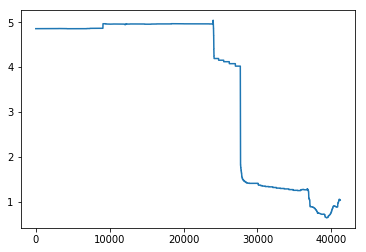

In [152]:
# Euro Interbank Offer Rate (3-month)
euro = df['euribor3m']
euro.plot()
df['euribor3m'].describe()
# Our dataset gives us the month and day in columns, but we are not given an actual "mm/dd/yyyy" format. 
# The month and day_of_week columns skip "Saturday" and "Sunday" as indicators are not measured on weekends.
# The same is true for the surveys, which were only conducted during the work-week.

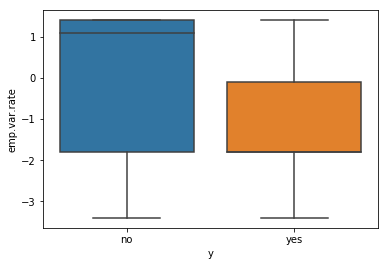

In [153]:
sns.boxplot(x='y', y='emp.var.rate', data=df)

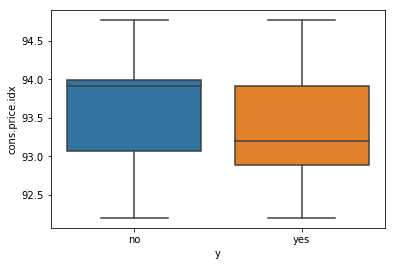

In [154]:
sns.boxplot(x='y', y='cons.price.idx', data=df)

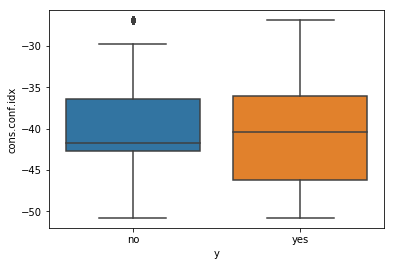

In [155]:
sns.boxplot(x='y', y='cons.conf.idx', data=df)

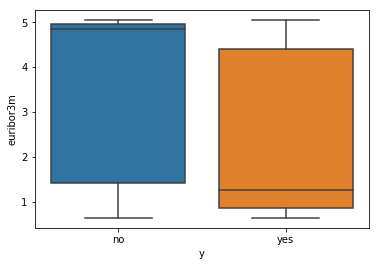

In [156]:
sns.boxplot(x='y', y='euribor3m', data=df)

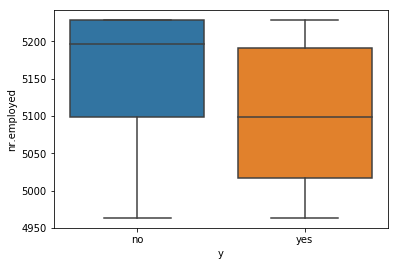

In [157]:
sns.boxplot(x='y', y='nr.employed', data=df)

# Client Demographics

In [158]:
# Creating a new demographic dataframe

demogDf = df.filter(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y'], axis=1)
demogDf.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


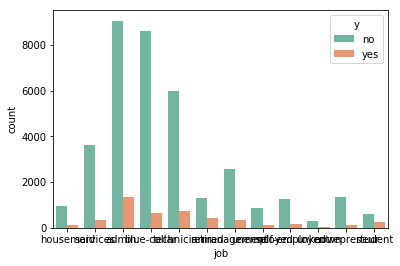

In [181]:
ax = sns.countplot(x='job', hue='y', data=demogDf, palette='Set2')

# show threshold, include in legend

In [160]:
def ageGroup(age):
    ouput = ''
    if age > 15 and age <= 20:
        output = '15 - 20'
    elif age > 20 and age <= 30:
        output = '21 - 30'
    elif age > 30 and age <= 40:
        output = '31 - 40'
    elif age > 40 and age <= 50:
        output = '41 - 50'    
    elif age > 50 and age <= 60:
        output = '51 - 60'
    elif age > 60 and age <= 70:
        output = '61 - 70'
    elif age > 70 and age <= 80:
        output = '71 - 80'   
    else:
        output = '> 80'
    return output

demogDf['Age_Group'] = demogDf['age'].apply(lambda x: ageGroup(x))
demogDf.head()

,age,job,marital,education,default,housing,loan,y,Age_Group
0,56,housemaid,married,basic.4y,no,no,no,no,51 - 60
1,57,services,married,high.school,unknown,no,no,no,51 - 60
2,37,services,married,high.school,no,yes,no,no,31 - 40
3,40,admin.,married,basic.6y,no,no,no,no,31 - 40
4,56,services,married,high.school,no,no,yes,no,51 - 60


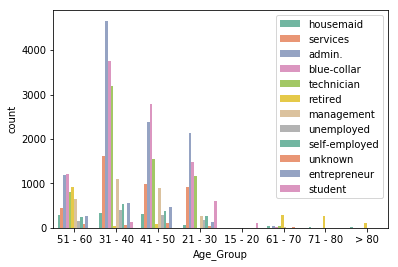

In [171]:
ax = sns.countplot(x='Age_Group', hue='job', data=demogDf, palette='Set2')
ax.legend(loc='upper right')

# break up into subplot

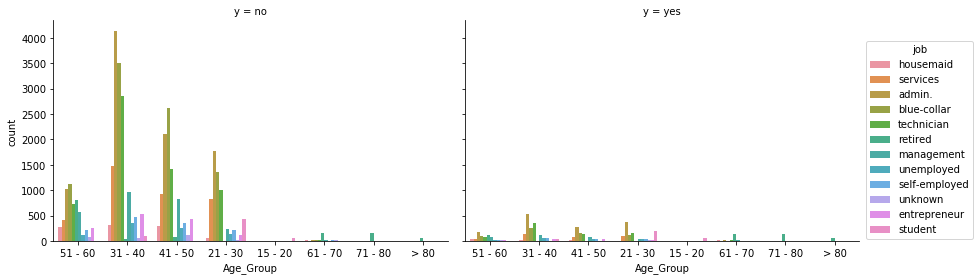

In [177]:
g = sns.factorplot(x='Age_Group', hue='job', col='y', data=demogDf, kind='count', size=4, aspect=1.5)

In [180]:
yesDf = demogDf.loc[demogDf['y'] == 'yes']
yesDf.head()

,age,job,marital,education,default,housing,loan,y,Age_Group
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,yes,41 - 50
83,49,entrepreneur,married,university.degree,unknown,yes,no,yes,41 - 50
88,49,technician,married,basic.9y,no,no,no,yes,41 - 50
129,41,technician,married,professional.course,unknown,yes,no,yes,41 - 50
139,45,blue-collar,married,basic.9y,unknown,yes,no,yes,41 - 50


In [ ]:
### test ###